- 안전운전자 예측
  - EDA - 베이스라인모델(LightGBM) - 성능개선1(LightGBM + 피처엔지니어링, 파라메터최적화) - 성능개선2(XGBoost) - 성능개선3(앙상블)

In [ ]:
import pandas as pd

In [ ]:
# https://drive.google.com/file/d/14bYukzdAEZiikPMFHH9V_xzcsobAUgS7/view?usp=drive_link
import gdown
file_id = '14bYukzdAEZiikPMFHH9V_xzcsobAUgS7'
download_url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(download_url, 'data.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=14bYukzdAEZiikPMFHH9V_xzcsobAUgS7
From (redirected): https://drive.google.com/uc?id=14bYukzdAEZiikPMFHH9V_xzcsobAUgS7&confirm=t&uuid=ec1da3e0-9f42-4a82-b5ac-daceb6900d5c
To: /content/data.zip
100%|██████████| 116M/116M [00:00<00:00, 237MB/s] 


'data.zip'

In [ ]:
!unzip 'data.zip'

Archive:  data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data.zip or
        data.zip.zip, and cannot find data.zip.ZIP, period.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/safe_drive.csv')

In [ ]:
# 피처요약표
# 결측값 시각
# 결측값 처리 :
  # 많으면 제거
  # 많지 않으면 대처
  # 결측값 자체가 예측에 도움이 되는경우 하나의 고유값으로 간주
# 머신러닝 모델 OOF 예측, LightGBM(마이크로소프트), XGBoost(부스팅 알고지름,결정트리를 직렬배치), 앙상블(여러개 조합)
# 피처엔지니어링 :
# 하이퍼 파라메터 최적화 : 베이지안 최적화
  # 베이지안 최적화 : 차원축소 와 같이 사용하면 효과

In [ ]:
data = df.copy()

In [ ]:
# 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [ ]:
# 음수데이터를 na로 치환

In [ ]:
data.replace(-1, pd.NA, inplace=True)

<Axes: >

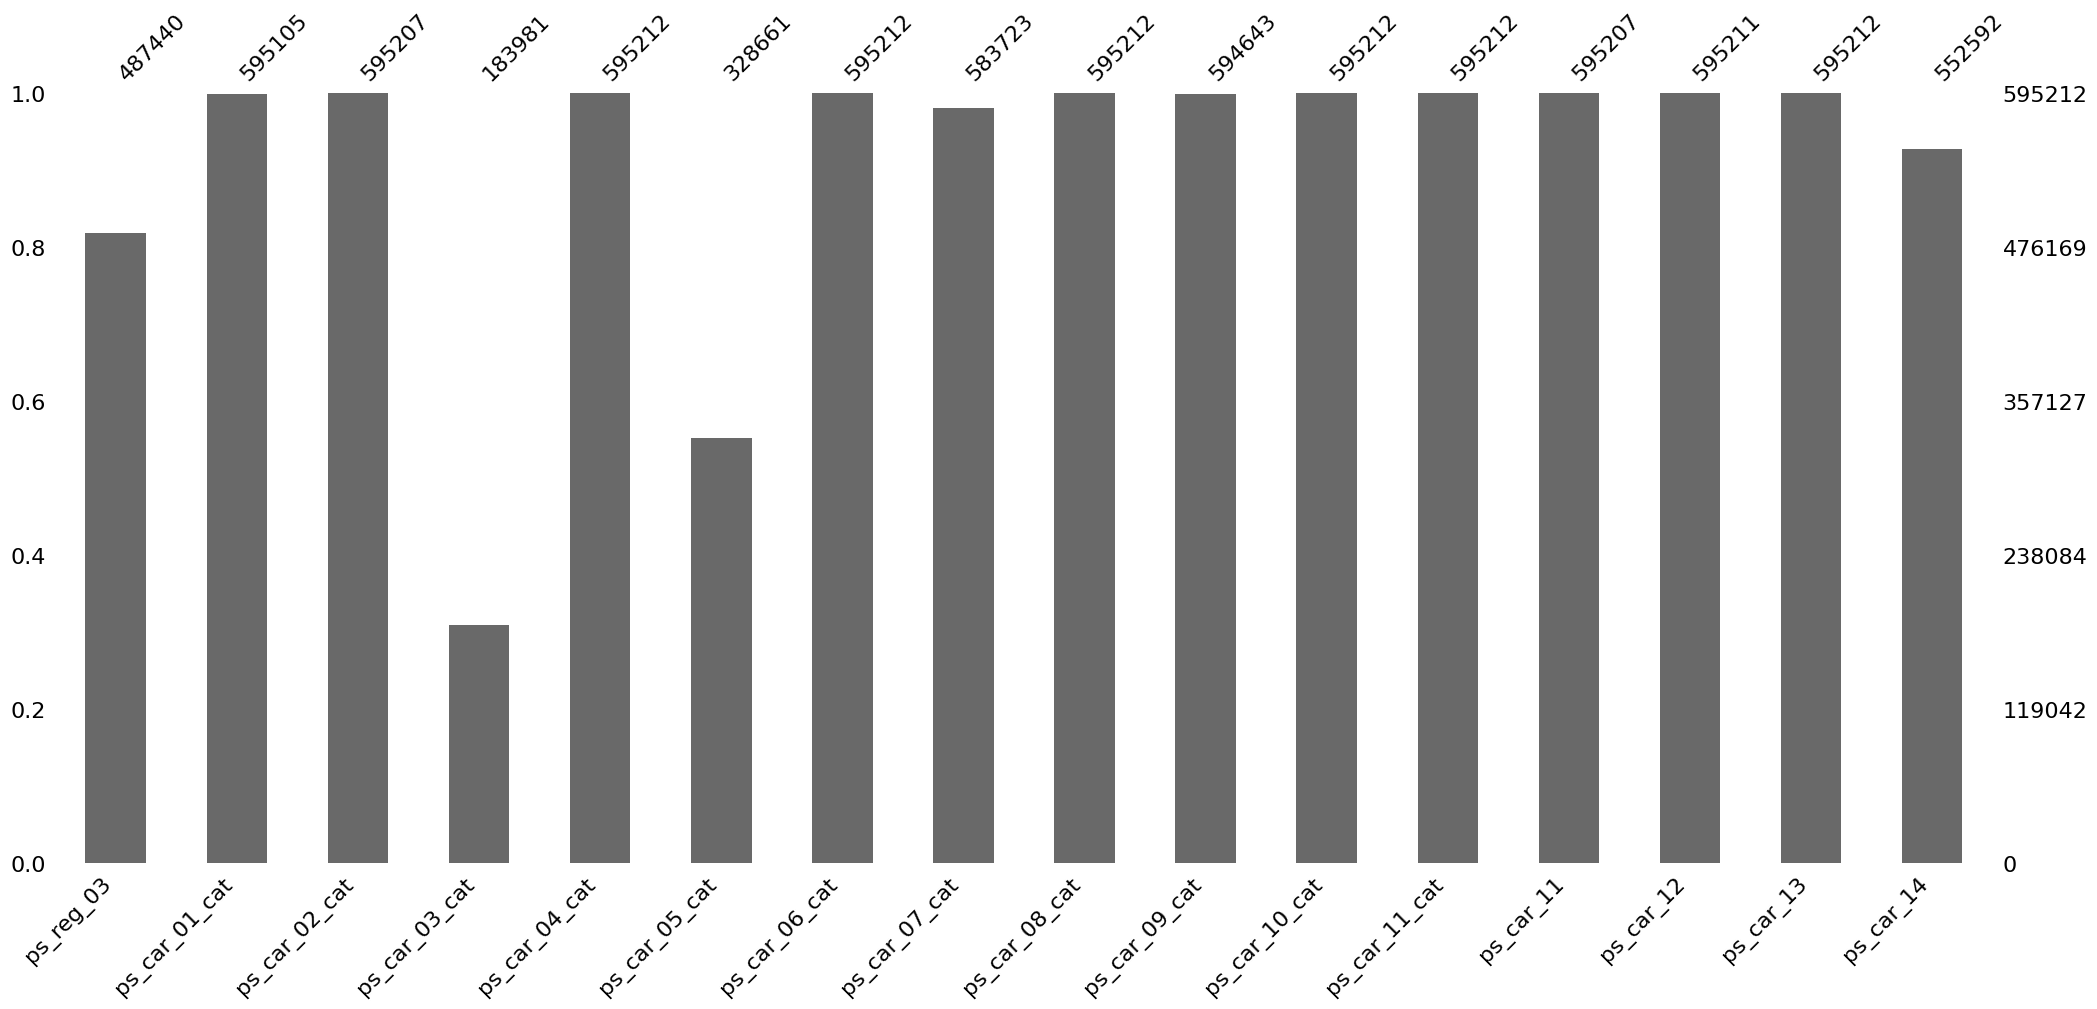

In [ ]:
msno.bar(df=data.loc[:,'ps_reg_03':'ps_car_14'])

In [ ]:
summary = pd.DataFrame(df.dtypes,columns=['데이터 타입'])
summary['결측값 개수'] = df.isna().sum()
summary['고윳값 개수'] = df.nunique().values
summary['데이터 종류'] = None
for indexName in summary.index:
  if 'bin' in indexName:
    summary.loc[indexName,'데이터 종류'] = '이진형'
  elif 'cat' in indexName:
    summary.loc[indexName,'데이터 종류'] = '명목형'
  elif summary.loc[indexName,'데이터 타입'] == float:
    summary.loc[indexName,'데이터 종류'] = '연속형'
  elif summary.loc[indexName,'데이터 타입'] == int:
    summary.loc[indexName,'데이터 종류'] = '순서형'
summary


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
id,int64,0,595212,순서형
target,int64,0,2,순서형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,0,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,0,3,명목형
ps_ind_05_cat,int64,0,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형


In [ ]:
summary['데이터 종류'].value_counts()

,count
데이터 종류,
순서형,18
이진형,17
명목형,14
연속형,10


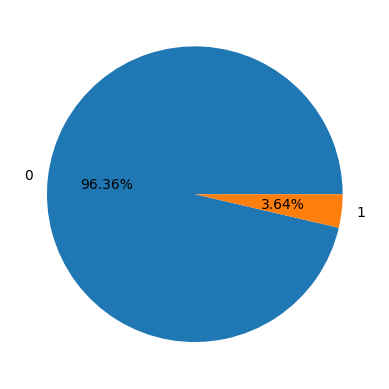

In [ ]:
# 데이터 시각화
# 타겟의 분포 - 전략.... 데이터의 편향 - %도 표시
plt.pie(df['target'].value_counts(),
        labels=df['target'].value_counts().index,
        autopct='%.2f%%'
        )
plt.show()

In [ ]:
# 이진계열은... bar 형태로 시각화 유리
bin_feature = summary.loc[summary['데이터 종류']=='이진형'].index
bin_feature

Index(['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object')

In [ ]:
# 시각화 함수
import matplotlib.gridspec as gridspec
import matplotlib as mpl

def plot_target_ratio_by_features(df, features, num_rows, num_cols,size=(12,18)):
  mpl.rc('font', size=9)
  plt.figure(figsize=size)
  grid = gridspec.GridSpec(ncols=num_cols, nrows=num_rows)
  plt.subplots_adjust(hspace=0.3, wspace=0.3)

  for i, feature in enumerate(features):
    ax = plt.subplot(grid[i])
    sns.barplot(x=feature, y='target', data=df, ax=ax)
  plt.show()

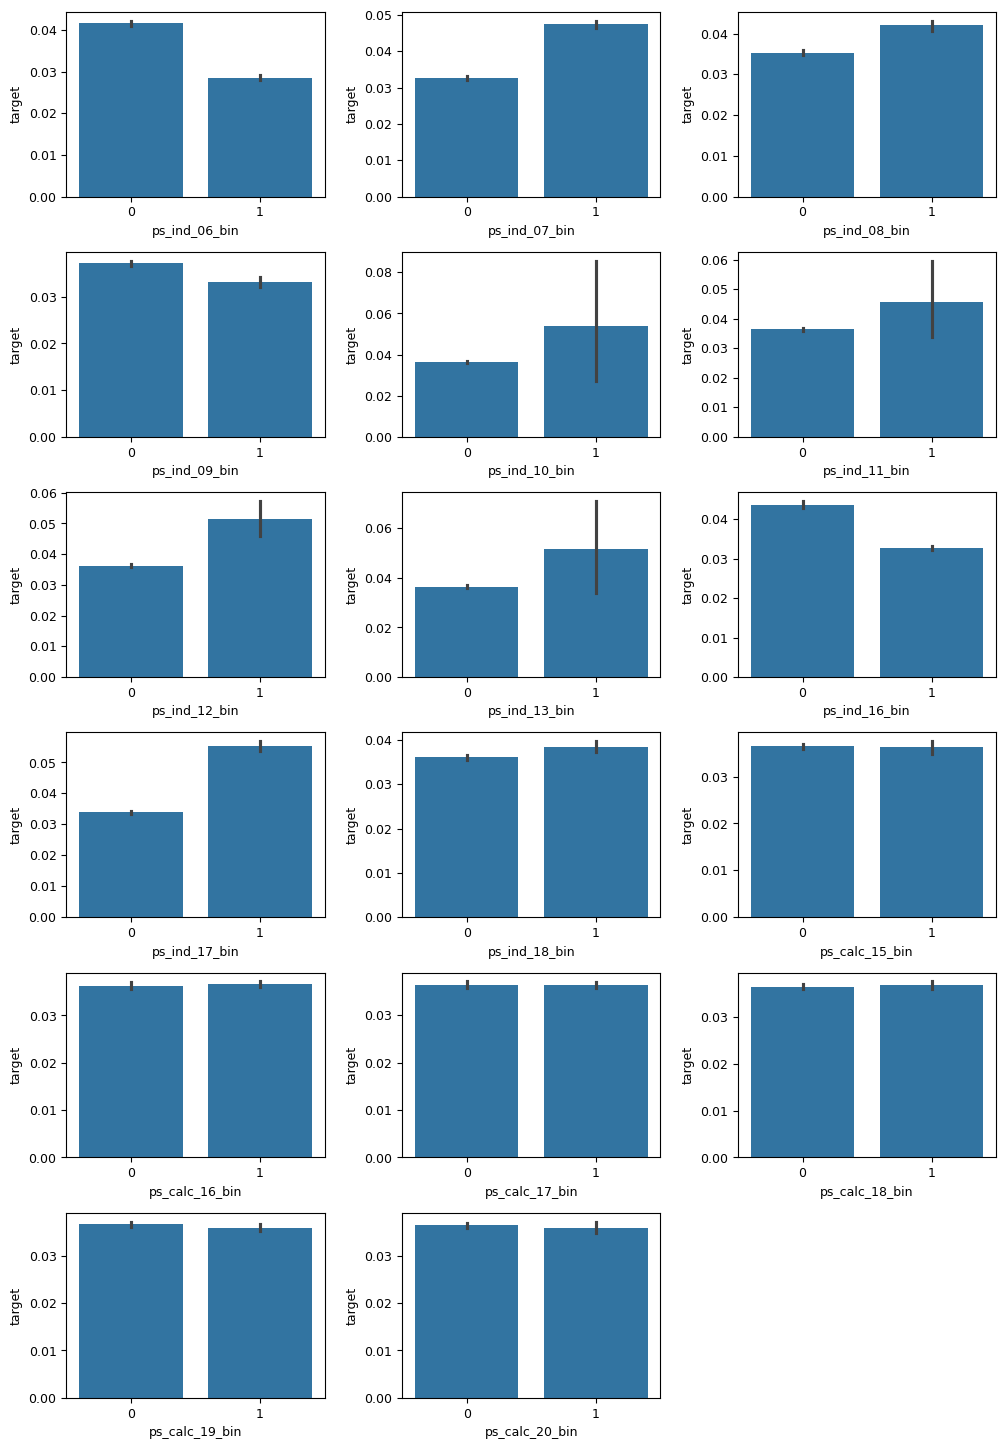

In [ ]:
bin_feature = summary.loc[summary['데이터 종류']=='이진형'].index
plot_target_ratio_by_features(df, bin_feature, num_rows=6, num_cols=3)

In [ ]:
# 명목형, 연속형, 및 데이터종류별로 시각화 함수를 통해서 시각화

In [ ]:
# 상관관계 : 연속형 데이터
# 결측치 제거 : heatmap

In [ ]:
reg_indexs = summary[summary['데이터 종류'] == '연속형'].index

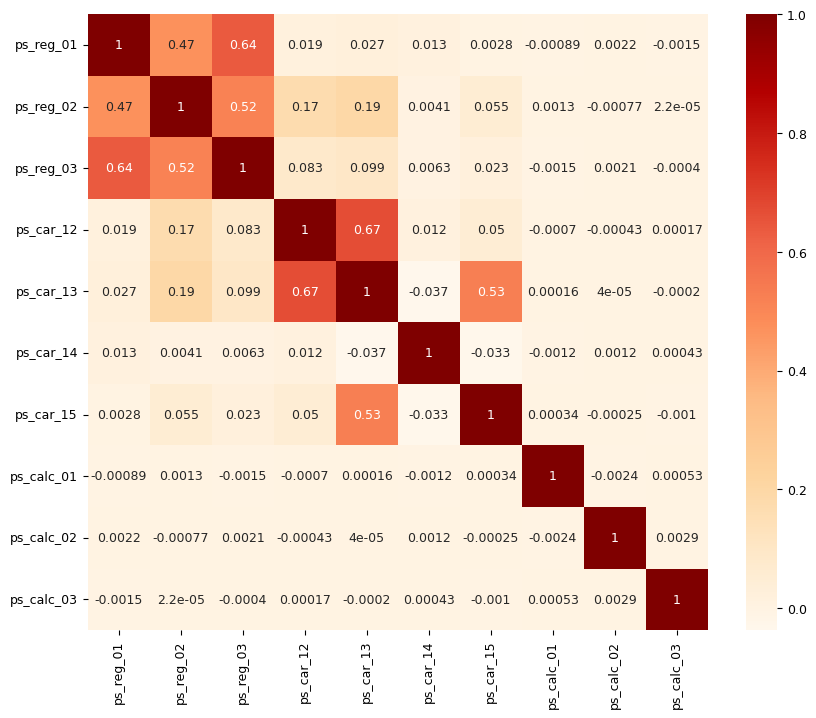

In [ ]:
plt.figure(figsize=(10,8))
train_copy =  df.copy().dropna()

corr = train_copy.loc[:,reg_indexs].corr()
sns.heatmap(corr, cmap='OrRd', annot=True)
plt.show()

- 베이스라인 모델

In [111]:
X = df.drop(columns=['id','target'])
Y = df['target']

In [112]:
# 카테고리형태의 명목형 피처는 onehot인코딩
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_feature = summary.loc[summary['데이터 종류'] == '명목형'].index
X_cat = ohe.fit_transform(X.loc[:,cat_feature])
X_cat

<595212x184 sparse matrix of type '<class 'numpy.float64'>'
	with 8332968 stored elements in Compressed Sparse Row format>

In [113]:
# 피처제거
drop_feature = cat_feature

In [114]:
X =X.drop(columns=drop_feature)
X = X.reset_index(drop=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 43 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ps_ind_01       595212 non-null  int64  
 1   ps_ind_03       595212 non-null  int64  
 2   ps_ind_06_bin   595212 non-null  int64  
 3   ps_ind_07_bin   595212 non-null  int64  
 4   ps_ind_08_bin   595212 non-null  int64  
 5   ps_ind_09_bin   595212 non-null  int64  
 6   ps_ind_10_bin   595212 non-null  int64  
 7   ps_ind_11_bin   595212 non-null  int64  
 8   ps_ind_12_bin   595212 non-null  int64  
 9   ps_ind_13_bin   595212 non-null  int64  
 10  ps_ind_14       595212 non-null  int64  
 11  ps_ind_15       595212 non-null  int64  
 12  ps_ind_16_bin   595212 non-null  int64  
 13  ps_ind_17_bin   595212 non-null  int64  
 14  ps_ind_18_bin   595212 non-null  int64  
 15  ps_reg_01       595212 non-null  float64
 16  ps_reg_02       595212 non-null  float64
 17  ps_reg_03 

In [115]:
# X와 X_cat 합친다.
X.shape, X_cat.shape

((595212, 43), (595212, 184))

In [116]:
all_data = pd.concat([X,pd.DataFrame(X_cat.toarray())], axis=1)

 -- OOF 방식으로 LightGBM 훈련
  - 교차검증에서 사용되는 방법

In [117]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [118]:
# from sklearn.model_selection import train_test_split
# x, x_test, y, y_test = train_test_split(all_data, y, test_size=0.2, random_state=42)
num_train = int(len(all_data)*0.8)
x = all_data[:num_train]
x_test = all_data[num_train:]
y = Y[:num_train]
y_test = Y[num_train:]

In [119]:
oof_val_preds = np.zeros(x.shape[0])
oof_test_preds = np.zeros(x_test.shape[0])

In [120]:
import lightgbm as lgb
params = {
    'objective':'binary',
    'learning_rate':0.01,
    'force_row_wise':True,
    'random_state':0
}

In [125]:
x

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,174,175,176,177,178,179,180,181,182,183
0,2,5,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,9,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476164,6,4,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
476165,4,3,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476166,2,11,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
476167,1,6,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sys import version
for idx,(train_idx, valid_idx) in enumerate(folds.split(x,y)):
  print("#"*40,f'폴드 {idx+1} / 폴드{folds.n_splits}', '#'*40)
  # 훈련용 데이터 ,검증용 데이터
  x_train,y_train = x.iloc[train_idx], y.iloc[train_idx]
  x_valid, y_valid = x.iloc[valid_idx], y.iloc[valid_idx]
  # light gbm 전용 데이터셋
  dtrain = lgb.Dataset(x_train, y_train)
  dvalid = lgb.Dataset(x_valid, y_valid)
  # 모델 훈련
  lgb_model = lgb.train(params, dtrain,
                        valid_sets=dvalid ,
                        callbacks=[lgb.early_stopping(100)] # Use early_stopping callback
                        )

######################################## 폴드 1 / 폴드5 ########################################
[LightGBM] [Info] Number of positive: 13873, number of negative: 367062
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 380935, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036418 -> initscore=-3.275586
[LightGBM] [Info] Start training from score -3.275586
Training until validation scores don't improve for 100 rounds
